In [1]:
%pip install --upgrade pip
%pip install python2verilog==0.1.9

Agent pid 210020
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Agent pid 210035
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from typing import Optional
from python2verilog import verilogify, context_to_text_and_file

In [3]:
def make_visual(generator_inst, directory: Optional[str] = None):
    """
    Any iterable of tuples where the tuples are of length > 0 will work.
    Visualizes the first 3 elements of each tuple as (x, y, colour)
    """

    # Generate the data using the generator function
    data_triple_list = []

    for idx, yields in enumerate(generator_inst):
        if isinstance(yields, int):
            yields = (yields,)
        if len(yields) >= 3:
            data_triple_list.append(yields[:3])
        elif len(yields) >= 2:
            data_triple_list.append((*yields[:2], 1))
        else:
            data_triple_list.append((yields[0], idx, 1))

    data_triple = np.array(data_triple_list)

    try:
        height = max(data_triple[:, 0])
        width = max(data_triple[:, 1])
        grid = np.zeros((int(height) + 1, int(width) + 1))
        for x_coord, y_coord, colour in data_triple:
            grid[x_coord, y_coord] = colour

        # Create the pixel-like plot
        plt.imshow(grid)

        # Set labels and title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Pixel-like Plot")

        # Add color bar
        cbar = plt.colorbar()
        cbar.set_label("Z")

        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()
        if directory: 
            plt.savefig(directory)

        plt.clf()
        plt.cla()
        plt.close()
        
    except IndexError as e:
        print(
            f"Skipping make_visual for {str(generator_inst)} due to negative outputs {e}",
        )

x: 41, y: 96, radius: 30
(86, 105)
[(56, 105), (26, 135), (-4, 105), (26, 135), (-4, 105), (26, 75), (56, 105), (26, 75), (56, 106), (27, 135), (-4, 106), (25, 135), (-4, 104), (25, 75), (56, 104), (27, 75), (56, 107), (28, 135), (-4, 107), (24, 135), (-4, 103), (24, 75), (56, 103), (28, 75), (56, 108), (29, 135), (-4, 108), (23, 135), (-4, 102), (23, 75), (56, 102), (29, 75), (56, 109), (30, 135), (-4, 109), (22, 135), (-4, 101), (22, 75), (56, 101), (30, 75), (56, 110), (31, 135), (-4, 110), (21, 135), (-4, 100), (21, 75), (56, 100), (31, 75), (55, 111), (32, 134), (-3, 111), (20, 134), (-3, 99), (20, 76), (55, 99), (32, 76), (55, 112), (33, 134), (-3, 112), (19, 134), (-3, 98), (19, 76), (55, 98), (33, 76), (55, 113), (34, 134), (-3, 113), (18, 134), (-3, 97), (18, 76), (55, 97), (34, 76), (55, 114), (35, 134), (-3, 114), (17, 134), (-3, 96), (17, 76), (55, 96), (35, 76), (54, 115), (36, 133), (-2, 115), (16, 133), (-2, 95), (16, 77), (54, 95), (36, 77), (54, 116), (37, 133), (-2, 1

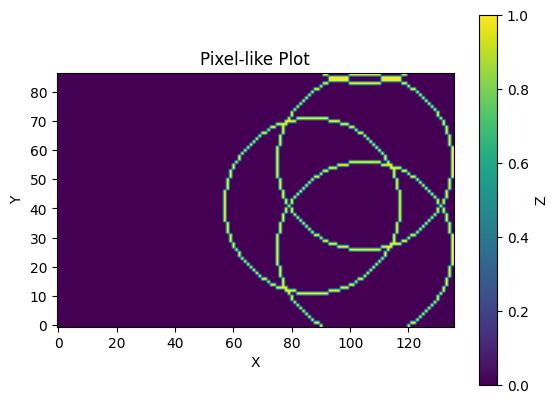

x: 61, y: 82, radius: 30
(106, 91)
[(76, 91), (46, 121), (16, 91), (46, 121), (16, 91), (46, 61), (76, 91), (46, 61), (76, 92), (47, 121), (16, 92), (45, 121), (16, 90), (45, 61), (76, 90), (47, 61), (76, 93), (48, 121), (16, 93), (44, 121), (16, 89), (44, 61), (76, 89), (48, 61), (76, 94), (49, 121), (16, 94), (43, 121), (16, 88), (43, 61), (76, 88), (49, 61), (76, 95), (50, 121), (16, 95), (42, 121), (16, 87), (42, 61), (76, 87), (50, 61), (76, 96), (51, 121), (16, 96), (41, 121), (16, 86), (41, 61), (76, 86), (51, 61), (75, 97), (52, 120), (17, 97), (40, 120), (17, 85), (40, 62), (75, 85), (52, 62), (75, 98), (53, 120), (17, 98), (39, 120), (17, 84), (39, 62), (75, 84), (53, 62), (75, 99), (54, 120), (17, 99), (38, 120), (17, 83), (38, 62), (75, 83), (54, 62), (75, 100), (55, 120), (17, 100), (37, 120), (17, 82), (37, 62), (75, 82), (55, 62), (74, 101), (56, 119), (18, 101), (36, 119), (18, 81), (36, 63), (74, 81), (56, 63), (74, 102), (57, 119), (18, 102), (35, 119), (18, 80), (35,

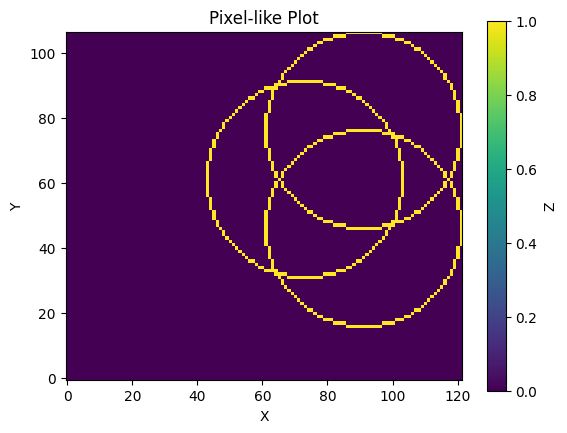

x: 75, y: 76, radius: 30
(120, 85)
[(90, 85), (60, 115), (30, 85), (60, 115), (30, 85), (60, 55), (90, 85), (60, 55), (90, 86), (61, 115), (30, 86), (59, 115), (30, 84), (59, 55), (90, 84), (61, 55), (90, 87), (62, 115), (30, 87), (58, 115), (30, 83), (58, 55), (90, 83), (62, 55), (90, 88), (63, 115), (30, 88), (57, 115), (30, 82), (57, 55), (90, 82), (63, 55), (90, 89), (64, 115), (30, 89), (56, 115), (30, 81), (56, 55), (90, 81), (64, 55), (90, 90), (65, 115), (30, 90), (55, 115), (30, 80), (55, 55), (90, 80), (65, 55), (89, 91), (66, 114), (31, 91), (54, 114), (31, 79), (54, 56), (89, 79), (66, 56), (89, 92), (67, 114), (31, 92), (53, 114), (31, 78), (53, 56), (89, 78), (67, 56), (89, 93), (68, 114), (31, 93), (52, 114), (31, 77), (52, 56), (89, 77), (68, 56), (89, 94), (69, 114), (31, 94), (51, 114), (31, 76), (51, 56), (89, 76), (69, 56), (88, 95), (70, 113), (32, 95), (50, 113), (32, 75), (50, 57), (88, 75), (70, 57), (88, 96), (71, 113), (32, 96), (49, 113), (32, 74), (49, 57), 

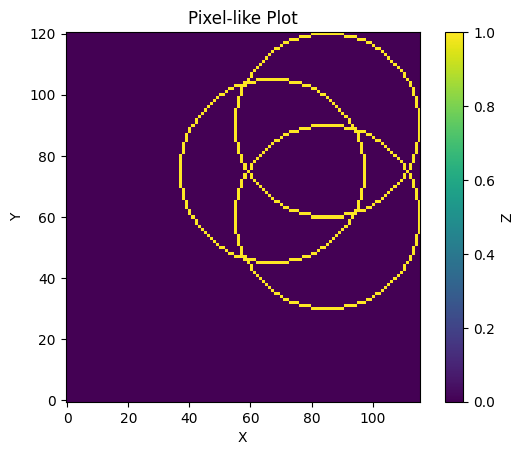

In [14]:
import math


namespace = {}


def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


def draw_reuleaux_triangle(centre_x, centre_y, radius):
    c_x = centre_x
    c_y = centre_y
    c_x1 = c_x + radius // 2
    c_y1 = c_y + round(radius * math.sqrt(3) / 6)
    c_x2 = c_x - radius // 2
    c_y2 = c_y + round(radius * math.sqrt(3) / 6)
    c_x3 = c_x
    c_y3 = c_y - round(radius * math.sqrt(3) / 6)

    gen0 = draw_circle(c_x1, c_y1, radius)
    print(next(gen0))
    yield from draw_circle(c_x2, c_y2, radius)
    yield from draw_circle(c_x3, c_y3, radius)
    for coord in gen0:  # throw error if no dupe
        yield coord


"""
1. limitation to only have one generator instance of each function
2. dupe hardware always (i.e. 3 draw_circle modules)
default dupe
"""

for _ in range(3):
    x, y, radius = (
        random.randint(30, 100),
        random.randint(30, 100),
        random.randint(30, 30),
    )
    print(f"x: {x}, y: {y}, radius: {radius}")
    print(list(draw_reuleaux_triangle(x, y, radius)))
    make_visual(draw_reuleaux_triangle(x, y, radius))
